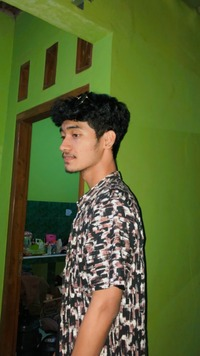

# Author :

*   Nama : Fitrah Saputra
*   Email : fitrahsaputra321@gmail.com

# Dog Vs Cat


1.   Image classification yang dibuat pada final project ini akan mengklasifikasikan gambar antara anjing dan kucing.
2.   Pada project ini akan menggunakan model Sequential untuk pengklasifikasiannya.
3. Dataset yang digunakan pada project ini merupakan dataset dari kaggle.
4. Dataset dibagi menjadi 80% train set dan 20% test set.
5. Model menggunakan Conv2D Maxpooling Layer.
6. Menggunakan Callback.
7. Menggunakan plot terhadap akurasi dan loss model.

# 1. Setup

In [1]:
import tensorflow as tf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install -q Kaggle
!mkdir -p ~/.kaggle               # membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle         # memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json  # merubah permission file kaggle.json

In [4]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 98% 772M/787M [00:06<00:00, 186MB/s]
100% 787M/787M [00:06<00:00, 122MB/s]


In [5]:
import zipfile, os

local_zip = '/content/kaggle-cat-vs-dog-dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
!pip install split_folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders

splitfolders.ratio('/content/kagglecatsanddogs_3367a/PetImages', output='data', seed=3, ratio=(.8, .2))

Copying files: 24961 files [00:04, 5476.11 files/s]


1.1 Load Data

In [8]:
data = '/content/data'
train_dir = os.path.join(data, 'train')
validation_dir = os.path.join(data, 'val')

# training
train_cat_dir = os.path.join(train_dir, 'Cat')
train_dog_dir = os.path.join(train_dir, 'Dog')

# validation
validation_cat_dir = os.path.join(validation_dir, 'Cat')
validation_dog_dir = os.path.join(validation_dir, 'Dog')

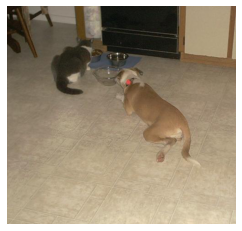

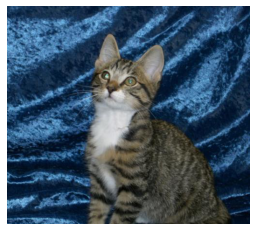

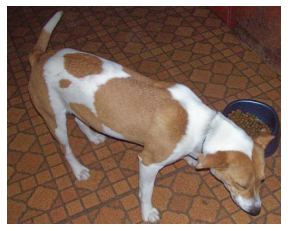

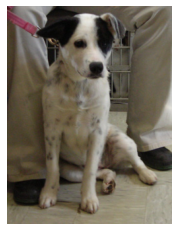

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

cat_files = os.listdir(train_cat_dir)
dog_files = os.listdir(train_dog_dir)

pic_index = random.randrange(0, 1000)

next_cat = [os.path.join(train_cat_dir, fname) 
                for fname in cat_files[pic_index-2:pic_index]]
next_dog = [os.path.join(train_dog_dir, fname) 
                for fname in dog_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_cat+next_dog):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# 2. Prepocessing Data

2.1 Scale Data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(                                           
    rescale = 1./255,
    zoom_range = 0.2,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

2.2 Split Data

In [11]:
train_generator = training_datagen.flow_from_directory(                           
    train_dir, 
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

validation_generator = training_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150),
    batch_size=16, 
    class_mode='categorical'
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


# 3. Membuat Model

3.1 membuat struktur model

In [12]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  
])

model.layers[0].trainable = False

234545216/234545216 [==============================] - 1s 0us/step


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96%!")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

3.2 Latih Model

In [15]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2,
    callbacks=[callbacks]
)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

2496/2496 - 246s - loss: 0.3856 - accuracy: 0.9405 - val_loss: 0.1693 - val_accuracy: 0.9463 - 246s/epoch - 98ms/step
Epoch 2/100
2496/2496 - 219s - loss: 0.1055 - accuracy: 0.9597 - val_loss: 0.0962 - val_accuracy: 0.9629 - 219s/epoch - 88ms/step
Epoch 3/100
2496/2496 - 219s - loss: 0.0941 - accuracy: 0.9650 - val_loss: 0.1498 - val_accuracy: 0.9431 - 219s/epoch - 88ms/step
Epoch 4/100
2496/2496 - 221s - loss: 0.0942 - accuracy: 0.9647 - val_loss: 0.1292 - val_accuracy: 0.9579 - 221s/epoch - 88ms/step
Epoch 5/100
2496/2496 - 219s - loss: 0.0866 - accuracy: 0.9650 - val_loss: 0.1527 - val_accuracy: 0.9589 - 219s/epoch - 88ms/step
Epoch 6/100
2496/2496 - 219s - loss: 0.0914 - accuracy: 0.9689 - val_loss: 0.1036 - val_accuracy: 0.9541 - 219s/epoch - 88ms/step
Epoch 7/100
2496/2496 - 218s - loss: 0.0923 - accuracy: 0.9670 - val_loss: 0.1628 - val_accuracy: 0.9349 - 218s/epoch - 88ms/step
Epoch 8/100
2496/2496 - 219s - loss: 0.0940 - accuracy: 0.9674 - val_loss: 0.1506 - val_accuracy: 0.94

# 4. Plot Data

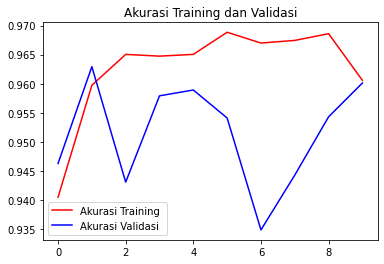

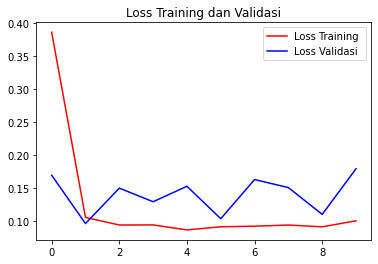

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Akurasi Training ')
plt.plot(epochs, val_acc, 'b', label = 'Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc = 0)
plt.show()

print('\n')

plt.plot(epochs, loss, 'r', label = 'Loss Training ')
plt.plot(epochs, val_loss, 'b', label = 'Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend(loc = 0)
plt.show()

# 5. Save Model

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('dogvscat.tflite', 'wb') as f:
  f.write(tflite_model)